In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 99

In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<AxesSubplot:>

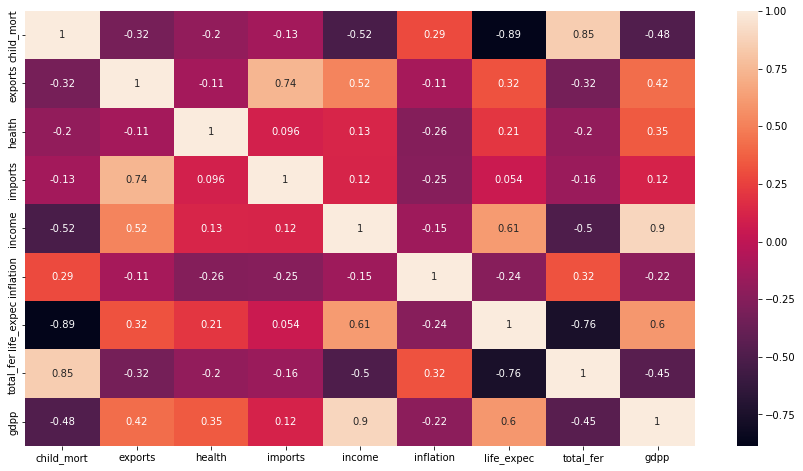

In [5]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)

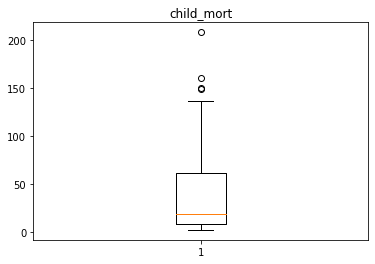

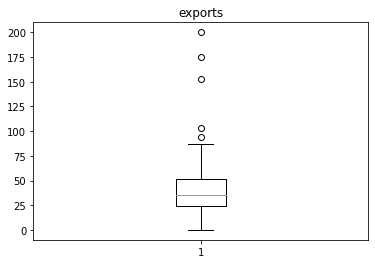

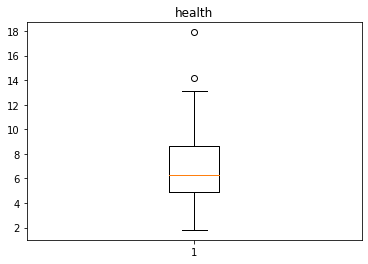

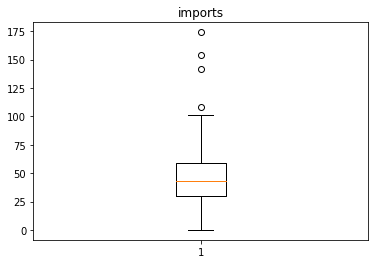

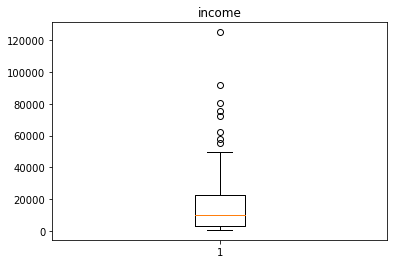

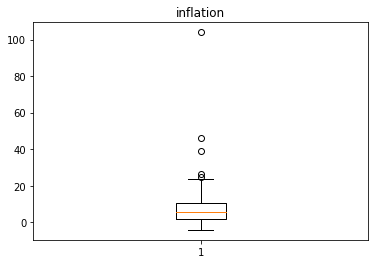

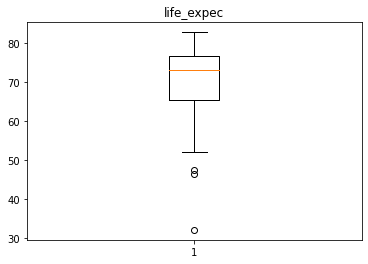

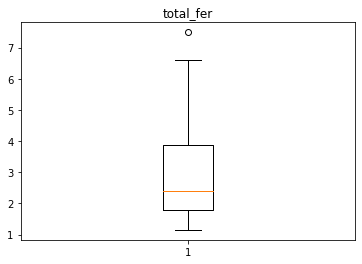

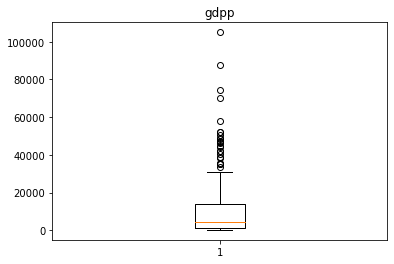

In [6]:
for i in df.columns[1:]:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

### Cleaning outliers

In [7]:
for i in df.columns[1:]:
    q1,q3=df[i].quantile([.25,.75])
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    df[i]=np.clip(df[i],a_min=lower,a_max=upper)

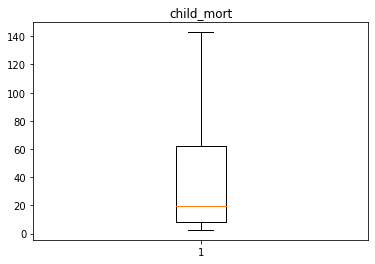

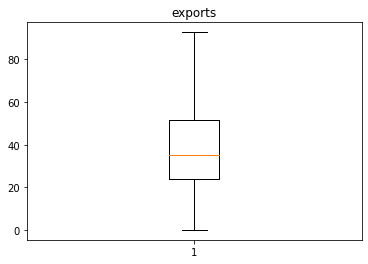

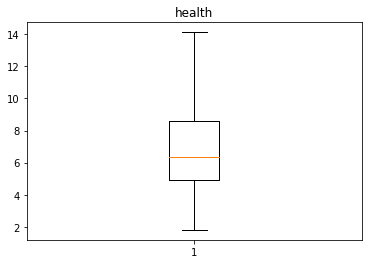

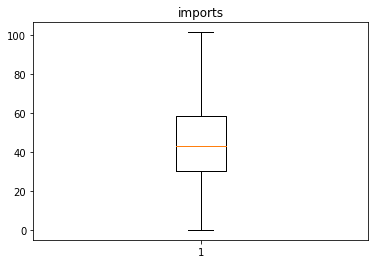

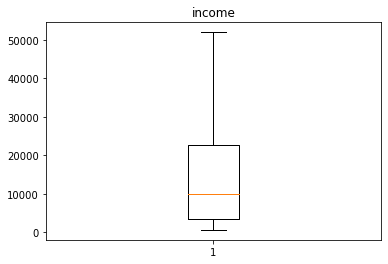

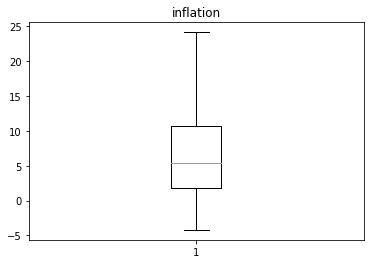

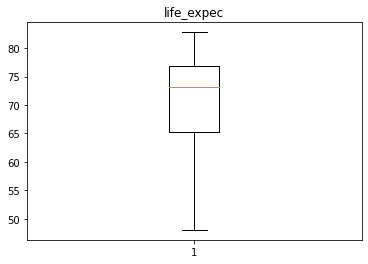

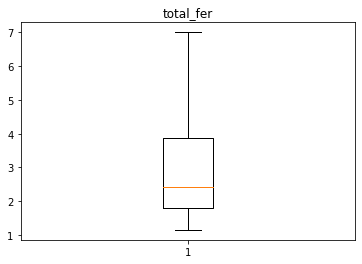

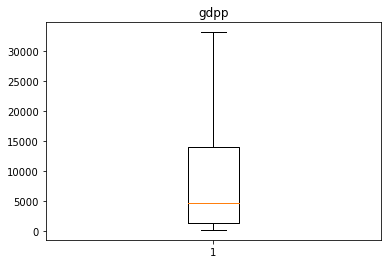

In [8]:
for i in df.columns[1:]:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [9]:
X = df.iloc[:,1:]
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(X)

In [11]:
df_scaled = pd.DataFrame(X, columns=df.columns[1:], index=df['country'])
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


### PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [13]:
pca.explained_variance_

array([4.42682241, 1.48967656, 1.24556933, 0.86056285, 0.58855308,
       0.18215655, 0.14992503, 0.08143967, 0.02951139])

<BarContainer object of 9 artists>

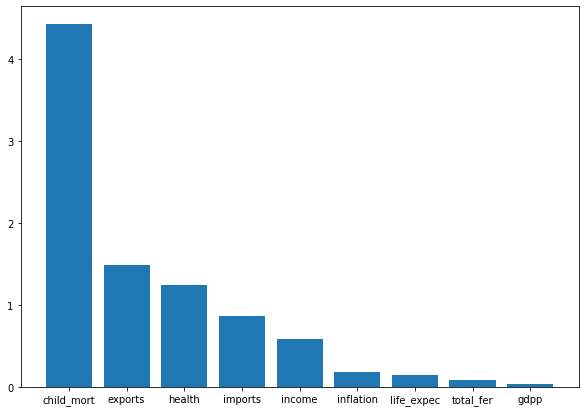

In [14]:
plt.figure(figsize=(10,7))
plt.bar(height=pca.explained_variance_, x=df_scaled.columns,)

In [15]:
cumulative = np.cumsum(pca.explained_variance_)
cumulative

array([4.42682241, 5.91649897, 7.1620683 , 8.02263114, 8.61118422,
       8.79334078, 8.94326581, 9.02470548, 9.05421687])

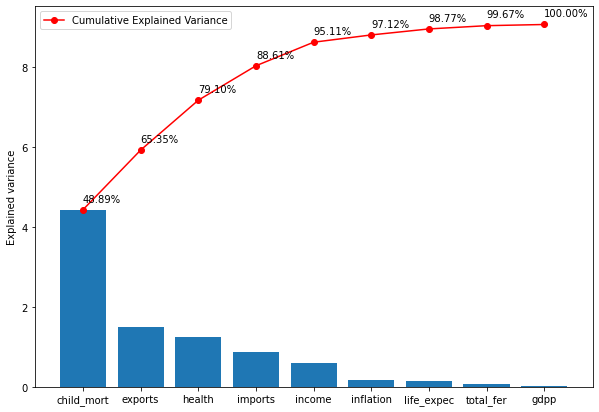

In [16]:
plt.figure(figsize=(10,7))
plt.bar(height=pca.explained_variance_, x=df_scaled.columns,)
plt.ylabel('Explained variance')

plt.plot(df_scaled.columns, cumulative, c='red', marker= 'o',
         label="Cumulative Explained Variance")

for i in range(len(df_scaled.columns)):
    plt.annotate("{:.2%}".format(cumulative[i]/cumulative[-1]), (df_scaled.columns[i], cumulative[i]+0.2))
    
plt.legend(loc='upper left')

In [17]:
pca = PCA(n_components=5)

In [18]:
df_scaled = pd.DataFrame(pca.fit_transform(df_scaled),index=df['country'])
df_scaled

,0,1,2,3,4
country,,,,,
Afghanistan,-3.177917,-0.251292,-1.011474,0.778804,-0.014102
Albania,0.434979,-0.218700,-0.292591,-1.391241,0.156711
Algeria,-0.416784,-0.613870,1.637859,-0.615021,0.536604
Angola,-3.306409,1.066649,2.151219,1.698677,0.160551
Antigua and Barbuda,1.253246,0.547778,-0.136955,-0.716890,-0.394628
...,...,...,...,...,...
Vanuatu,-0.882087,0.945856,-0.227550,-0.680105,-0.551247
Venezuela,-0.240053,-1.742315,2.238331,-0.080500,1.318475
Vietnam,0.305579,2.152785,0.455745,-0.746171,1.383759


### K - Means

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_pred = kmeans.fit_predict(df_scaled)
kmeans_pred

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [21]:
# we have to determine that which number represents which category of country

In [22]:
df['status_kmeans'] = kmeans_pred
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,2
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,2
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,2
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1


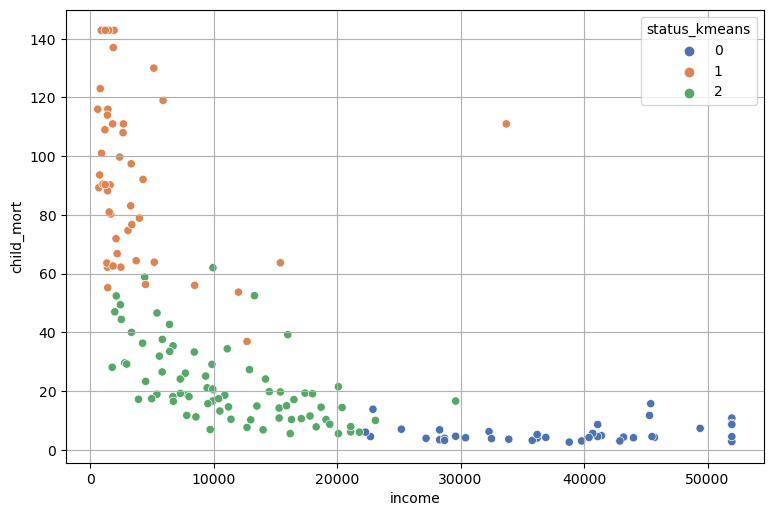

In [23]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='child_mort',hue='status_kmeans', palette='deep')
plt.grid()
# high income + low child mortality => developed countries(0)
# medium income + medium child mortality => developing countries(2)
# low income + high child mortality => under-developed countries(1)

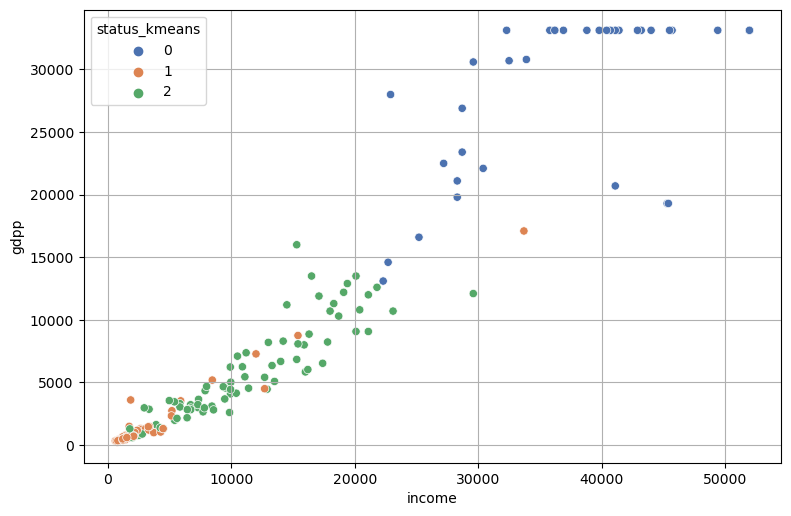

In [24]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='gdpp',hue='status_kmeans', palette='deep')
plt.grid()
# high income + high gdpp => developed countries(0)
# medium income + medium gdpp => developing countries(2)
# low income + low gdpp => under-developed countries(1)

In [25]:
df['status_kmeans'].replace({0:'developed',1:'under-developed',2:'developing'},inplace=True)

<AxesSubplot:xlabel='status_kmeans', ylabel='count'>

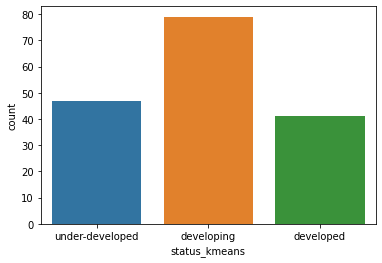

In [26]:
sns.countplot(df['status_kmeans'])

In [27]:
df[df['status_kmeans']=='developed']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status_kmeans
7,Australia,4.8,19.800,8.73,20.900,41400.0,1.160,82.0,1.93,33130.0,developed
8,Austria,4.3,51.300,11.00,47.800,43200.0,0.873,80.5,1.44,33130.0,developed
10,Bahamas,13.8,35.000,7.89,43.700,22900.0,-0.393,73.8,1.86,28000.0,developed
11,Bahrain,8.6,69.500,4.97,50.900,41100.0,7.440,76.0,2.16,20700.0,developed
15,Belgium,4.5,76.400,10.70,74.700,41100.0,1.880,80.0,1.86,33130.0,developed
23,Brunei,10.5,67.400,2.84,28.000,51967.5,16.700,77.1,1.84,33130.0,developed
29,Canada,5.6,29.100,11.30,31.000,40700.0,2.870,81.3,1.63,33130.0,developed
42,Cyprus,3.6,50.200,5.97,57.500,33900.0,2.010,79.9,1.42,30800.0,developed
43,Czech Republic,3.4,66.000,7.88,62.900,28300.0,-1.430,77.5,1.51,19800.0,developed
44,Denmark,4.1,50.500,11.40,43.600,44000.0,3.220,79.5,1.87,33130.0,developed


### Hierarchical clustering

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

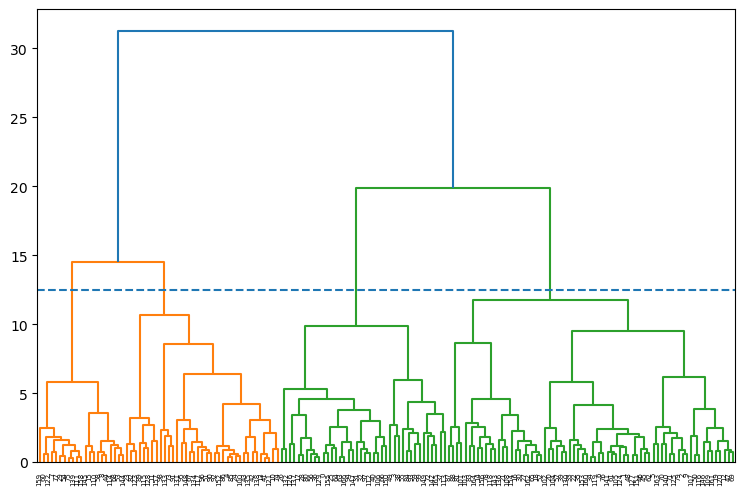

In [32]:
plt.figure(figsize=(9,6), dpi=100)
dendrogram(linkage(df_scaled, method='ward', metric='euclidean'))
plt.axhline(linestyle='--', y=12.5)
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
# affinity='euclidean', linkage='ward' by default
hc = AgglomerativeClustering(n_clusters=3)
hc_pred = hc.fit_predict(df_scaled)
hc_pred

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

In [35]:
df['status_hc'] = hc_pred

In [36]:
# we have to determine that which number represents which category of country for this method too.

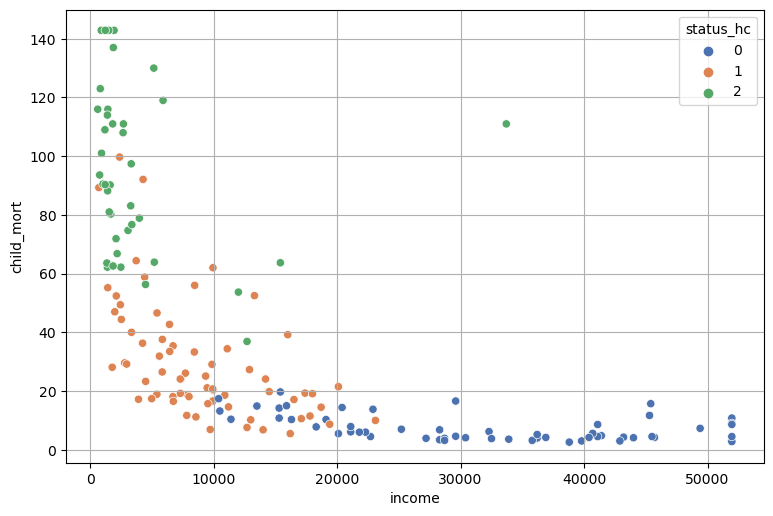

In [37]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='child_mort',hue='status_hc', palette='deep')
plt.grid()
# high income + low child mortality => developed countries(0)
# medium income + medium child mortality => developing countries(1)
# low income + high child mortality => under-developed countries(2)

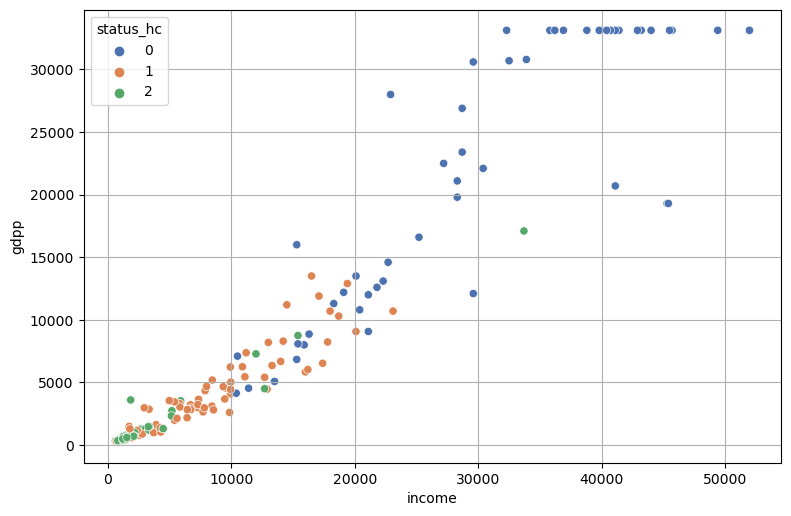

In [38]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='income',y='gdpp',hue='status_hc', palette='deep')
plt.grid()
# high income + high gdpp => developed countries(0)
# medium income + medium gdpp => developing countries(1)
# low income + low gdpp => under-developed countries(2)

In [39]:
df['status_hc'].replace({0:'developed',1:'developing',2:'under-developed'},inplace=True)

In [40]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status_kmeans,status_hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,under-developed,under-developed
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,developing,developing
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,developing,developing
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,under-developed,under-developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,developing,developed
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,developing,developing
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,developing,developing
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,developing,developing
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,under-developed,under-developed
